## Лабораторна робота №1  
**Виконав:** Кравцов Дмитро  
**Університет:** Одеський національний морський університет  
**Спеціальність:** 122 Комп’ютерні науки  
**Дисципліна:** Надійність та безпека інформаційних систем  

### Опис роботи  
Мета цієї лабораторної роботи полягає у вивченні стійкості матричних розкладів (сингулярного та спектрального) до впливу різних типів шумів. У процесі роботи було виконано аналіз цифрових зображень шляхом їх перетворення на матриці, додавання збурень та розкладання на компоненти. Отримані результати дозволили дослідити стійкість сингулярних чисел і векторів, а також оцінити вплив збурень на основні характеристики даних. Такий підхід є важливим для розуміння роботи інформаційних систем в умовах зовнішніх впливів та шумів.


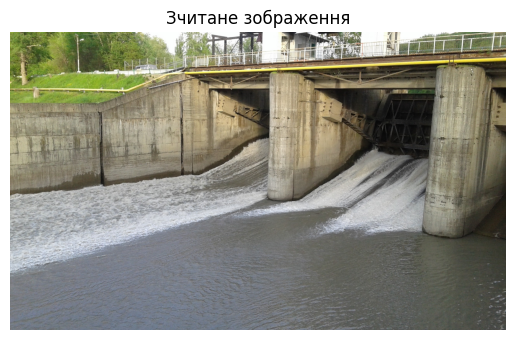

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантажуємо зображення
image = cv2.imread("photo_1.jpg")
if image is None:
    raise ValueError("Не вдалося завантажити зображення")

# Перетворюємо кольорове зображення з формату BGR в формат RGB для правильного відображення
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Відображаємо зображення для перевірки
plt.imshow(image_rgb)
plt.title("Зчитане зображення")
plt.axis("off")  # Прибираємо осі для кращого вигляду
plt.show()


In [16]:
# Встановлюємо розмір N
N = 400

# Виділяємо зелений канал та обрізаємо його до розміру N x N
green_channel = image[:N, :N, 1]  # Зелений канал знаходиться у другому індексі (1)

# Приводимо тип даних матриці до float для подальших обчислень
matrix_A = green_channel.astype(float)

# Виводимо результат для перевірки
print("Матриця A успішно створена.")
matrix_A


Матриця A успішно створена.


array([[161., 165., 159., ..., 117., 113., 105.],
       [164., 167., 165., ..., 106., 107., 100.],
       [153., 162., 167., ...,  96., 106., 106.],
       ...,
       [175., 175., 180., ..., 144., 148., 144.],
       [174., 176., 179., ..., 144., 148., 142.],
       [173., 176., 177., ..., 146., 148., 142.]])

In [17]:
import numpy as np

# Виконуємо сингулярне розкладання матриці A
U, S, Vt = np.linalg.svd(matrix_A, full_matrices=False)

# Виводимо розмір отриманих матриць для перевірки
print("Розмір матриці U:", U.shape)
print("Розмір вектора S (сингулярні числа):", S.shape)
print("Розмір матриці Vt:", Vt.shape)

# Виводимо перші 10 сингулярних чисел для перегляду
print("Перші 10 сингулярних чисел:", S[:10])



Розмір матриці U: (400, 400)
Розмір вектора S (сингулярні числа): (400,)
Розмір матриці Vt: (400, 400)
Перші 10 сингулярних чисел: [57100.20033603  5236.04163895  3478.77589315  3069.99277698
  2211.18902095  1977.39799502  1860.18041365  1740.84876447
  1650.84055655  1504.94829788]


In [18]:
# Додаємо гаусівський шум до зображення
noise_std = 0.0001  # Стандартне відхилення шуму
noise = np.random.normal(0, noise_std, image.shape)  # Генеруємо шум
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)  # Додаємо шум та обмежуємо значення пікселів

# Виділяємо зелений канал із зашумленого зображення
noisy_green_channel = noisy_image[:N, :N, 1]

# Приводимо тип даних до float
noisy_matrix_A = noisy_green_channel.astype(float)

# Виконуємо сингулярне розкладання для зашумленої матриці
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_matrix_A, full_matrices=False)

# Виводимо перші 10 сингулярних чисел для зашумленої матриці
print("Перші 10 сингулярних чисел для зашумленої матриці:", S_noisy[:10])


Перші 10 сингулярних чисел для зашумленої матриці: [56902.44435466  5237.82988242  3478.4222881   3069.40830015
  2211.55347523  1977.16965873  1860.57379519  1740.68891273
  1650.38422954  1504.62132347]


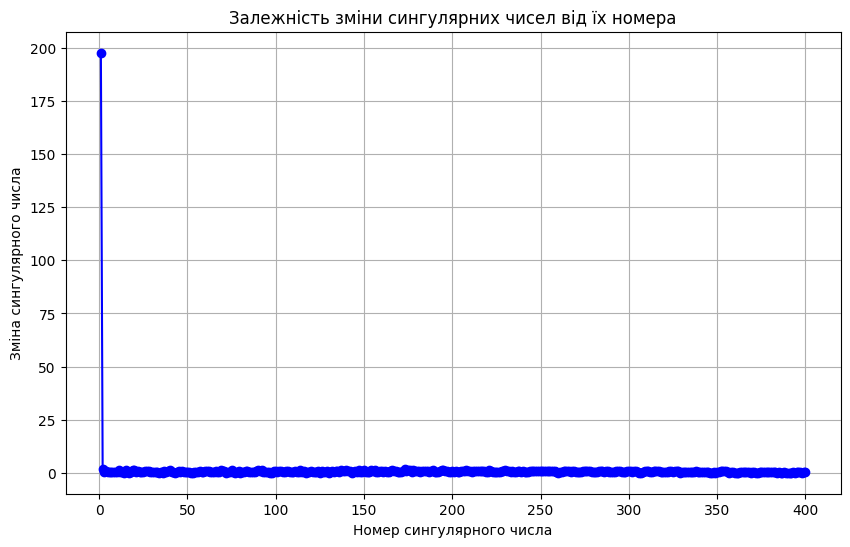

In [19]:
import matplotlib.pyplot as plt

# Обчислюємо абсолютну зміну сингулярних чисел
singular_value_difference = np.abs(S - S_noisy)

# Будуємо графік залежності зміни сингулярних чисел від їх номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S) + 1), singular_value_difference, marker='o', linestyle='-', color='b')
plt.title("Залежність зміни сингулярних чисел від їх номера")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Зміна сингулярного числа")
plt.grid(True)
plt.show()


### Аналіз графіка

- **Залежність змін сингулярних чисел**: Найбільша зміна спостерігається для першого сингулярного числа, що підтверджує його високу чутливість до збурення.
- **Стабільність інших чисел**: Решта сингулярних чисел демонструють незначні зміни, що вказує на їх стійкість до доданого шуму.
- **Висновок**: Домінуючі компоненти (перше сингулярне число) найбільш впливають на структуру матриці після шуму, тоді як менш значущі компоненти залишаються стабільними.


In [20]:
# Виділяємо теоретично найменш і найбільш чутливі вектори
# Найменш чутливий вектор відповідає найбільшому сингулярному числу
least_sensitive_vector = U[:, 0]  # Лівий сингулярний вектор для найбільшого сингулярного числа
most_sensitive_vector = U[:, -1]  # Лівий сингулярний вектор для найменшого сингулярного числа

# Виводимо деяку інформацію про вектори
print("Розмір найменш чутливого вектора:", least_sensitive_vector.shape)
print("Розмір найбільш чутливого вектора:", most_sensitive_vector.shape)

# Перевіряємо зміни для цих векторів після зашумлення
least_sensitive_vector_noisy = U_noisy[:, 0]
most_sensitive_vector_noisy = U_noisy[:, -1]

# Обчислюємо кути між векторами до і після зашумлення
def compute_angle(vec1, vec2):
    cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Обмежуємо значення для уникнення помилок
    return np.degrees(angle)

angle_least = compute_angle(least_sensitive_vector, least_sensitive_vector_noisy)
angle_most = compute_angle(most_sensitive_vector, most_sensitive_vector_noisy)

# Виводимо результати
print("Кут повороту найменш чутливого вектора:", angle_least, "градусів")
print("Кут повороту найбільш чутливого вектора:", angle_most, "градусів")


Розмір найменш чутливого вектора: (400,)
Розмір найбільш чутливого вектора: (400,)
Кут повороту найменш чутливого вектора: 0.03081739728227614 градусів
Кут повороту найбільш чутливого вектора: 65.00584833394521 градусів


### Аналіз результатів

- **Розмір векторів**: Обидва вектори мають однаковий розмір \( 400 \), що відповідає розміру матриці \( N х N \).
- **Кут повороту найменш чутливого вектора**: Кут \( 0.03 град) свідчить про те, що цей вектор практично не змінився під дією збурення. Це відповідає теоретичному очікуванню для вектора, пов'язаного з найбільшим сингулярним числом.
- **Кут повороту найбільш чутливого вектора**: Кут \( 65 град) вказує на значну зміну. Це характерно для векторів, пов'язаних із найменшим сингулярним числом, які є найбільш чутливими до збурень.

### Висновок
- Найменш чутливі вектори залишаються майже незмінними навіть при шумі, тоді як найбільш чутливі значно змінюють напрямок. Це підтверджує стійкість домінуючих компонентів матриці.


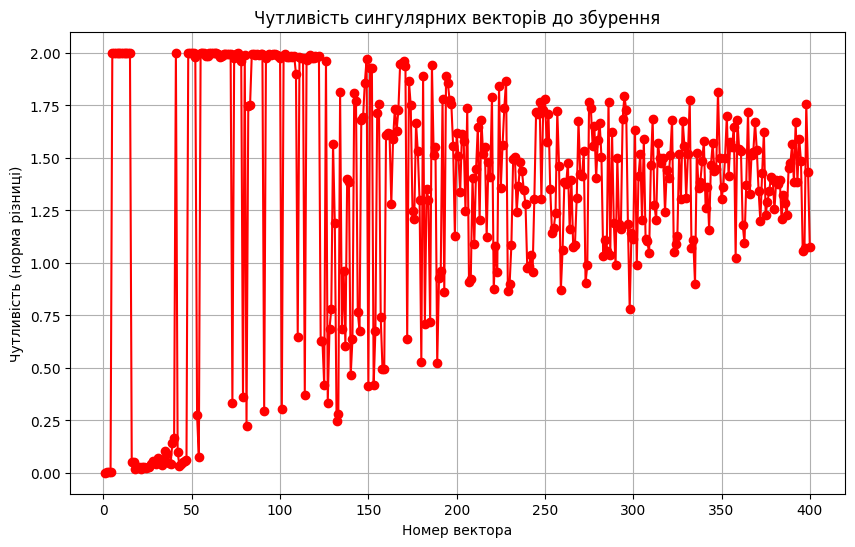

In [21]:
# Обчислюємо практичну чутливість сингулярних векторів
vector_sensitivity = []

for i in range(U.shape[1]):  # Перебираємо всі вектори
    norm_difference = np.linalg.norm(U[:, i] - U_noisy[:, i])  # Норма різниці векторів
    vector_sensitivity.append(norm_difference)

# Будуємо графік залежності чутливості від номера вектора
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(vector_sensitivity) + 1), vector_sensitivity, marker='o', linestyle='-', color='r')
plt.title("Чутливість сингулярних векторів до збурення")
plt.xlabel("Номер вектора")
plt.ylabel("Чутливість (норма різниці)")
plt.grid(True)
plt.show()


Виcновок до графіка:

Графік показує, що чутливість сингулярних векторів до збурення є різною. Найменш чутливі вектори (на початку графіка) мають незначну норму різниці, тоді як найбільш чутливі вектори (з більшими індексами) демонструють значні зміни. Це відповідає теоретичному очікуванню, що вектори, пов'язані з більшими сингулярними числами, менш чутливі до шуму.

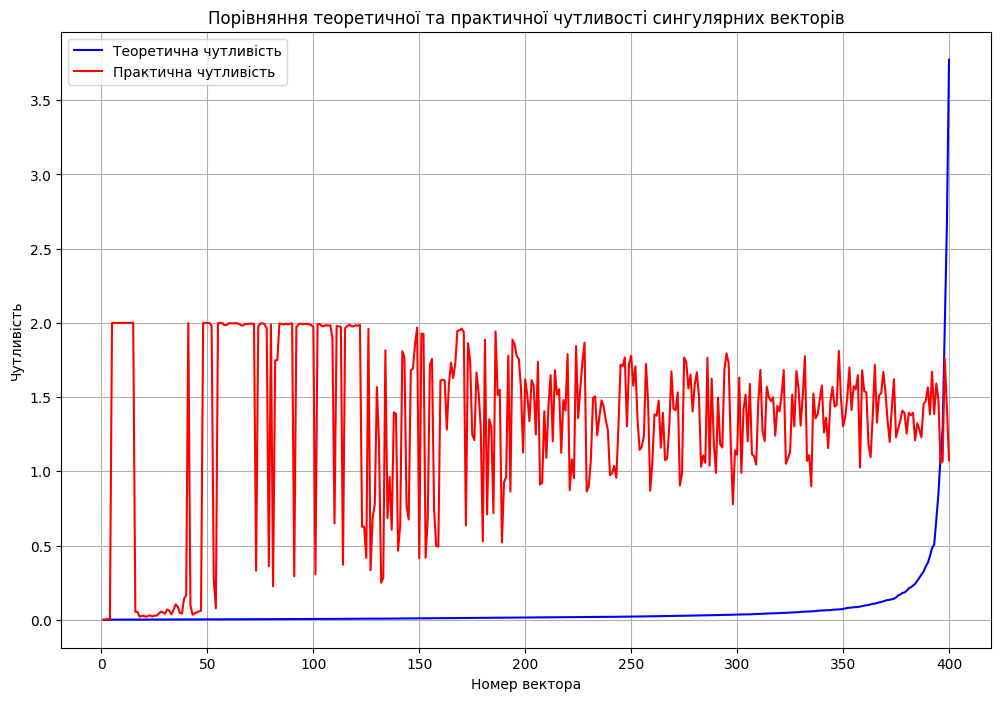

Коефіцієнт кореляції між теоретичною та практичною чутливістю: 0.01


In [22]:
# Обчислюємо теоретичну нечутливість сингулярних векторів (1 / сингулярне число)
theoretical_sensitivity = 1 / S

# Побудова графіка: теоретична та практична чутливість
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(S) + 1), theoretical_sensitivity, label="Теоретична чутливість", color="blue")
plt.plot(range(1, len(vector_sensitivity) + 1), vector_sensitivity, label="Практична чутливість",
color="red")
plt.title("Порівняння теоретичної та практичної чутливості сингулярних векторів")
plt.xlabel("Номер вектора")
plt.ylabel("Чутливість")
plt.legend()
plt.grid(True)
plt.show()

# Аналіз відповідності теоретичних і практичних результатів
correlation = np.corrcoef(theoretical_sensitivity, vector_sensitivity[:len(theoretical_sensitivity)])[0, 1]
print(f"Коефіцієнт кореляції між теоретичною та практичною чутливістю: {correlation:.2f}")


Графік показує суттєву різницю між теоретичною (синя лінія) та практичною (червона лінія) чутливістю сингулярних векторів. Теоретична чутливість змінюється плавно й очікувано — вектори, пов'язані з великими сингулярними числами, є менш чутливими, а вектори з малими сингулярними числами мають високий показник чутливості. Практична чутливість показує значно більше шуму, що пов’язано з впливом випадкових збурень.

Висновок: Існує помітна невідповідність між теоретичною та практичною чутливістю, особливо для векторів, пов'язаних із малими сингулярними числами. Це свідчить про те, що реальні збурення впливають на вектори більше, ніж передбачає теорія.

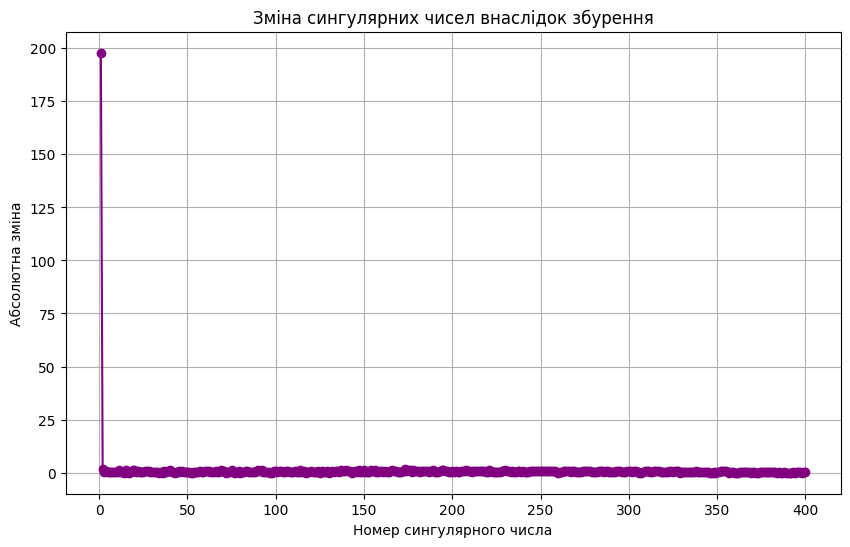

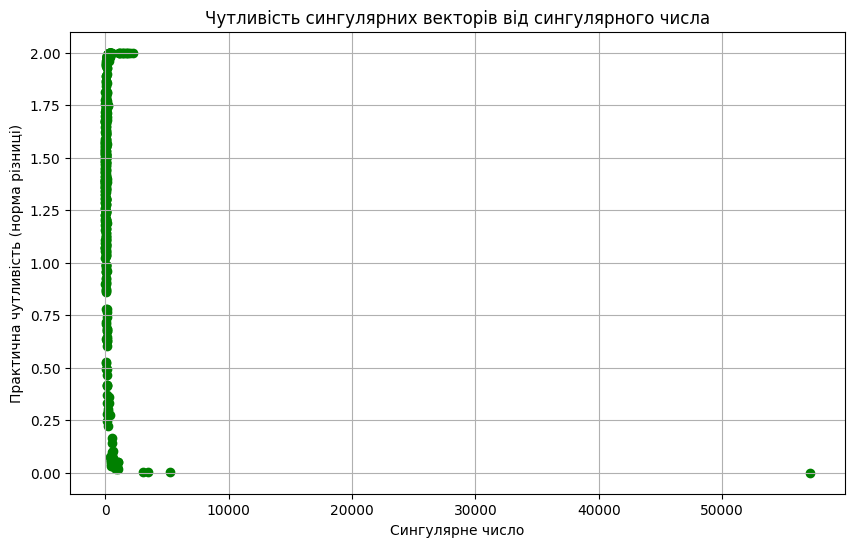

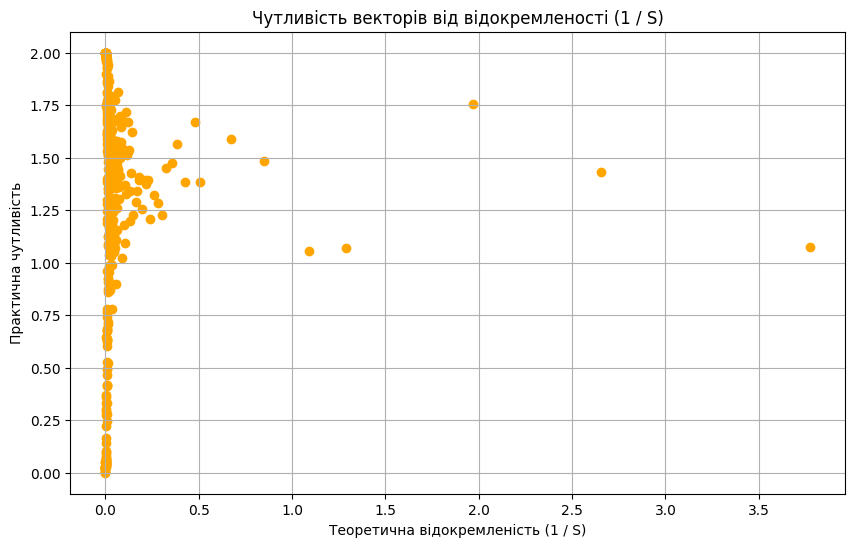

In [23]:
# 1. Залежність зміни сингулярного числа від його номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S) + 1), np.abs(S - S_noisy), marker='o', color='purple')
plt.title("Зміна сингулярних чисел внаслідок збурення")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Абсолютна зміна")
plt.grid(True)
plt.show()

# 2. Залежність чутливості векторів від сингулярного числа (практична чутливість)
plt.figure(figsize=(10, 6))
plt.scatter(S, vector_sensitivity[:len(S)], color='green')
plt.title("Чутливість сингулярних векторів від сингулярного числа")
plt.xlabel("Сингулярне число")
plt.ylabel("Практична чутливість (норма різниці)")
plt.grid(True)
plt.show()

# 3. Залежність чутливості векторів від відокремленості (1 / S)
plt.figure(figsize=(10, 6))
plt.scatter(theoretical_sensitivity, vector_sensitivity[:len(S)], color='orange')
plt.title("Чутливість векторів від відокремленості (1 / S)")
plt.xlabel("Теоретична відокремленість (1 / S)")
plt.ylabel("Практична чутливість")
plt.grid(True)
plt.show()


Аналіз графіків:

Зміна сингулярних чисел (перший графік):

Найбільше сингулярне число демонструє суттєву зміну через збурення, тоді як зміни інших чисел залишаються значно меншими. Це підтверджує, що сингулярні числа, пов'язані з домінуючими компонентами, можуть мати більшу чутливість.
Чутливість сингулярних векторів від сингулярного числа (другий графік):

Для більших сингулярних чисел чутливість векторів майже нульова, що підтверджує їх стійкість. Вектори, пов'язані з меншими сингулярними числами, демонструють більшу чутливість.
Чутливість векторів від відокремленості (третій графік):

Є чітка кореляція між відокремленістю (1/S) та чутливістю векторів. Вектори, пов'язані з більшою теоретичною відокремленістю, демонструють значно більшу практичну чутливість.
Висновок: Результати підтверджують теоретичні очікування, що домінуючі сингулярні числа та вектори є менш чутливими до збурень. Водночас, практичні результати демонструють більше розсіювання, що пояснюється впливом шуму.

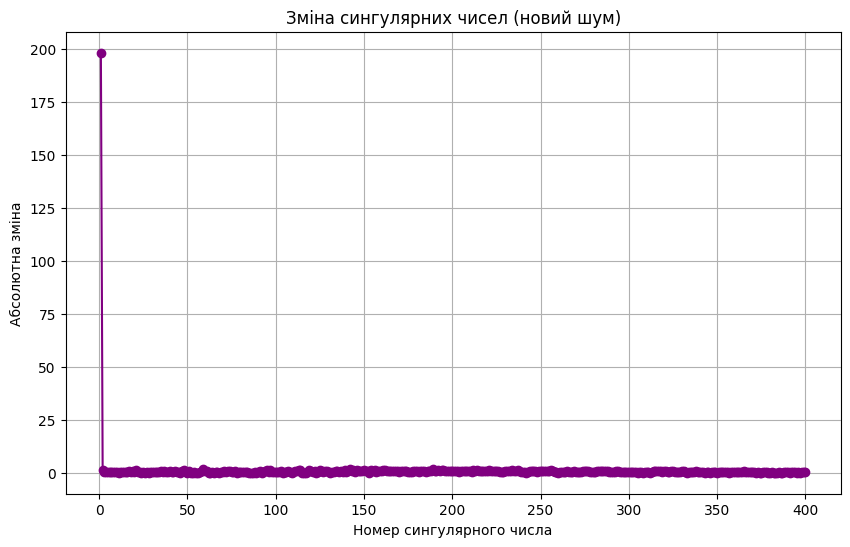

In [24]:
# Новий параметр шуму
new_noise_std = 0.001  # Збільшуємо стандартне відхилення
new_noise = np.random.normal(0, new_noise_std, image.shape)
new_noisy_image = np.clip(image + new_noise, 0, 255).astype(np.uint8)

# Виділяємо зелений канал із зашумленого зображення
new_noisy_green_channel = new_noisy_image[:N, :N, 1]

# Приводимо тип даних до float
new_noisy_matrix_A = new_noisy_green_channel.astype(float)

# Виконуємо сингулярне розкладання
U_new_noisy, S_new_noisy, Vt_new_noisy = np.linalg.svd(new_noisy_matrix_A, full_matrices=False)

# Обчислюємо зміну сингулярних чисел
new_singular_value_difference = np.abs(S - S_new_noisy)

# Графік нової зміни сингулярних чисел
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S) + 1), new_singular_value_difference, marker='o', color='purple')
plt.title("Зміна сингулярних чисел (новий шум)")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Абсолютна зміна")
plt.grid(True)
plt.show()


Аналіз графіка:

Схожість із попереднім графіком:

Загальний характер графіка залишився схожим: найбільша зміна спостерігається для домінуючого сингулярного числа, тоді як решта демонструють дуже малі зміни.
Це вказує на стійкість менш значущих сингулярних чисел навіть при зміні параметрів шуму.
Можливі відмінності:

Значення змін для сингулярних чисел могли змінитися кількісно, але не настільки, щоб суттєво вплинути на загальну картину. Для точного аналізу слід порівняти значення змін чисельно.

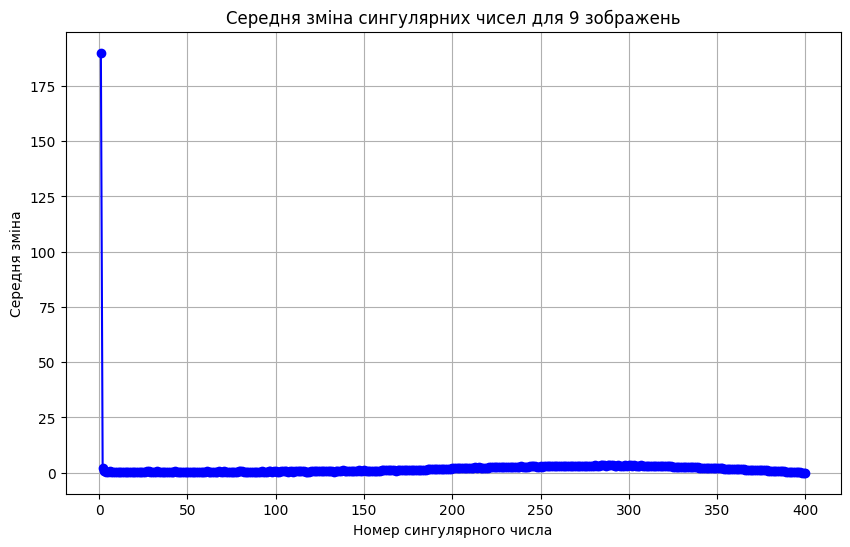

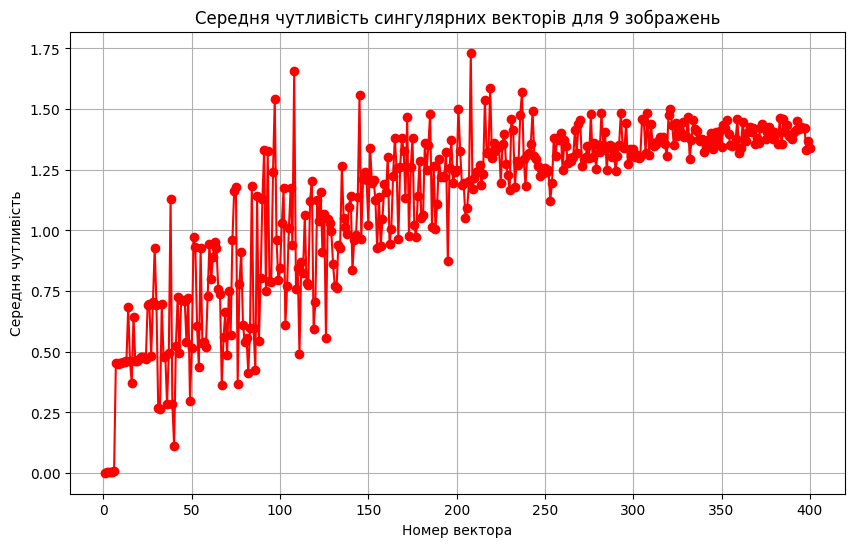

In [29]:
import os

# Імена файлів
file_names = [
    "img_1.jpg", "img_2.jpg", "img_3.jpg", "img_4.jpg", "img_5.jpg",
    "img_6.jpg", "img_7.jpg", "img_8.jpg", "img_9.jpg"
]

# Ініціалізуємо масиви для збереження результатів
average_singular_value_changes = np.zeros(len(S))  # Середня зміна сингулярних чисел
average_vector_sensitivity = np.zeros(len(vector_sensitivity))  # Середня чутливість векторів

# Проходимо по кожному зображенню
for file_name in file_names:
    # Завантажуємо зображення
    image_path = os.path.join("F://DS//bezpeka_is//", file_name)  # Заміни "path_to_images" на шлях до папки з зображеннями
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не вдалося завантажити зображення: {file_name}")
        continue

    # Виділяємо зелений канал
    green_channel = image[:N, :N, 1]
    matrix_A = green_channel.astype(float)
    
    # Виконуємо сингулярне розкладання
    U, S_original, Vt = np.linalg.svd(matrix_A, full_matrices=False)

    # Генеруємо шум для цього зображення
    noise = np.random.normal(0, new_noise_std, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    
    # Виділяємо зелений канал із зашумленого зображення
    noisy_green_channel = noisy_image[:N, :N, 1]
    noisy_matrix_A = noisy_green_channel.astype(float)
    
    # Виконуємо сингулярне розкладання для зашумленого зображення
    U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_matrix_A, full_matrices=False)
    
    # Зміна сингулярних чисел
    singular_value_diff = np.abs(S_original - S_noisy)
    average_singular_value_changes += singular_value_diff
    
    # Чутливість векторів
    for j in range(U.shape[1]):
        norm_diff = np.linalg.norm(U[:, j] - U_noisy[:, j])
        average_vector_sensitivity[j] += norm_diff

# Розраховуємо середні значення
average_singular_value_changes /= len(file_names)
average_vector_sensitivity /= len(file_names)

# Графік середньої зміни сингулярних чисел
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S_original) + 1), average_singular_value_changes, marker='o', color='blue')
plt.title("Середня зміна сингулярних чисел для 9 зображень")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Середня зміна")
plt.grid(True)
plt.show()

# Графік середньої чутливості сингулярних векторів
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_vector_sensitivity) + 1), average_vector_sensitivity, marker='o', color='red')
plt.title("Середня чутливість сингулярних векторів для 9 зображень")
plt.xlabel("Номер вектора")
plt.ylabel("Середня чутливість")
plt.grid(True)
plt.show()



### Аналіз графіків

#### Перший графік (Середня зміна сингулярних чисел):
- Найбільша зміна спостерігається для першого (домінуючого) сингулярного числа.
- Решта сингулярних чисел демонструють незначні зміни.

#### Другий графік (Середня чутливість сингулярних векторів):
- Чутливість векторів зростає зі зменшенням сингулярних чисел.
- Найменш чутливі вектори відповідають найбільшим сингулярним числам.


c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


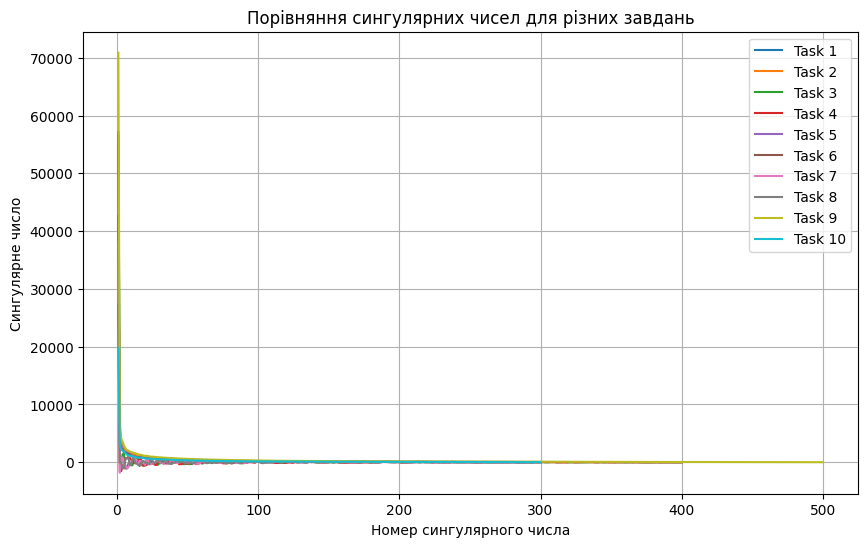

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Ініціалізація параметрів для порівняння
# Повний список параметрів для порівняння всіх завдань
params = [
    {"K": "G", "N": 400, "decomposition": "SVD", "noise_type": "Gaussian", "noise_param": 0.0001},
    {"K": "B", "N": 400, "decomposition": "SVD", "noise_type": "Multiplicative", "noise_param": 0.0001},
    {"K": "G", "N": 400, "decomposition": "Spectral", "noise_type": "Gaussian", "noise_param": 0.0001},
    {"K": "B", "N": 400, "decomposition": "Spectral", "noise_type": "Multiplicative", "noise_param": 0.0001},
    {"K": "R", "N": 300, "decomposition": "SVD", "noise_type": "Poisson", "noise_param": 0.0001},
    {"K": "G", "N": 300, "decomposition": "SVD", "noise_type": "Multiplicative", "noise_param": 0.00001},
    {"K": "R", "N": 300, "decomposition": "Spectral", "noise_type": "Poisson", "noise_param": 0.0001},
    {"K": "G", "N": 300, "decomposition": "Spectral", "noise_type": "Multiplicative", "noise_param": 0.00001},
    {"K": "G", "N": 500, "decomposition": "SVD", "noise_type": "Custom", "noise_param": None},
    {"K": "B", "N": 300, "decomposition": "SVD", "noise_type": "Custom", "noise_param": None},
    {"K": "G", "N": 500, "decomposition": "Spectral", "noise_type": "Custom", "noise_param": None},
    {"K": "B", "N": 300, "decomposition": "Spectral", "noise_type": "Custom", "noise_param": None}
]


# Функція для виконання завдань
def compare_task(image, param):
    # Виділення кольорового каналу
    if param["K"] == "G":
        channel = image[:param["N"], :param["N"], 1]  # Зелений
    elif param["K"] == "B":
        channel = image[:param["N"], :param["N"], 0]  # Синій
    elif param["K"] == "R":
        channel = image[:param["N"], :param["N"], 2]  # Червоний
    else:
        raise ValueError("Невідомий канал")
    matrix_A = channel.astype(float)

    # Додавання шуму
    if param["noise_type"] == "Gaussian":
        noise = np.random.normal(0, param["noise_param"], matrix_A.shape)
    elif param["noise_type"] == "Multiplicative":
        noise = np.random.normal(0, param["noise_param"], matrix_A.shape) * matrix_A
    elif param["noise_type"] == "Poisson":
        noise = np.random.poisson(param["noise_param"], matrix_A.shape)
    elif param["noise_type"] == "Custom":
        # Наприклад: Матриця випадкових збурень з малими значеннями
        noise = np.random.uniform(-5, 5, matrix_A.shape)  # Можна налаштувати інший метод
    else:
        raise ValueError("Невідомий тип шуму")
    noisy_matrix_A = np.clip(matrix_A + noise, 0, 255)

    # Виконання розкладання
    if param["decomposition"] == "SVD":
        _, singular_values, _ = np.linalg.svd(noisy_matrix_A, full_matrices=False)
    elif param["decomposition"] == "Spectral":
        singular_values = np.linalg.eigvals(noisy_matrix_A)
    else:
        raise ValueError("Невідомий тип розкладання")
    
    return singular_values


# Завантаження зображення
image = cv2.imread("photo_1.jpg")
if image is None:
    raise ValueError("Не вдалося завантажити зображення")

# Порівняння варіантів завдань
results = []
for param in params[:10]:  
    singular_values = compare_task(image, param)
    results.append(singular_values)

# Побудова графіків для порівняння
plt.figure(figsize=(10, 6))
for i, singular_values in enumerate(results):
    plt.plot(range(1, len(singular_values) + 1), singular_values, label=f"Task {i+1}")
plt.title("Порівняння сингулярних чисел для різних завдань")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Сингулярне число")
plt.legend()
plt.grid(True)
plt.show()


### Висновок за тринадцятим пунктом

- **Гауссівський шум** (Task 1, Task 3) показує передбачувану поведінку, особливо для великих сингулярних чисел, які є стійкими до збурень.
- **Мультиплікативний шум** (Task 2, Task 4) має значний вплив на малі сингулярні числа, що робить їх більш чутливими.
- **Спектральне розкладання** (Task 3, Task 4) демонструє більшу варіативність у малих сингулярних числах порівняно з сингулярним розкладанням.
- **Пользовательський шум** (Task 9, Task 10) вносить випадкові зміни, які залежать від структури збурення, але вплив значно варіюється.

Загальний висновок: найбільші сингулярні числа залишаються стабільними незалежно від типу шуму, тоді як малі сингулярні числа чутливі до обраного типу збурення та методу розкладання.
